In [1]:
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define directories
train_dir = 'data'  # Your training data directory

# Label Encoding
class_names = sorted(os.listdir(train_dir))  # Get class names from folder names
label_encoder = LabelEncoder()
label_encoder.fit(class_names)
num_classes = len(class_names)

# Data Generator with Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(299, 299),  # Resize for Xception input
    batch_size=32,
    class_mode='categorical'
)

# Load and Prepare Xception Model
def build_xception_model():
    base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

# Compile and Train the Model
def compile_and_train(model, model_name):
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Define Callbacks
    checkpoint = ModelCheckpoint(f'{model_name}_best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    
    # Train the model
    model.fit(
        train_generator,
        epochs=20,
        callbacks=[checkpoint, early_stopping]
    )

# Build, compile, and train the Xception model
xception_model = build_xception_model()
print("Training Xception Model...")
compile_and_train(xception_model, 'xception')


Found 35126 images belonging to 5 classes.
Training Xception Model...


c:\Users\Vishwa Murugan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 7979s 7s/step - accuracy: 0.7521 - loss: 0.7598
Epoch 2/20


c:\Users\Vishwa Murugan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_accuracy available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)
c:\Users\Vishwa Murugan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


1098/1098 ━━━━━━━━━━━━━━━━━━━━ 7465s 7s/step - accuracy: 0.7952 - loss: 0.6170
Epoch 3/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 8982s 8s/step - accuracy: 0.8093 - loss: 0.5714
Epoch 4/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 11103s 10s/step - accuracy: 0.8211 - loss: 0.5360
Epoch 5/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 8510s 8s/step - accuracy: 0.8278 - loss: 0.5021
Epoch 6/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 7099s 6s/step - accuracy: 0.8388 - loss: 0.4692
Epoch 7/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 7097s 6s/step - accuracy: 0.8450 - loss: 0.4422
Epoch 8/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 7094s 6s/step - accuracy: 0.8607 - loss: 0.3982
Epoch 9/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 7099s 6s/step - accuracy: 0.8729 - loss: 0.3606
Epoch 10/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 7101s 6s/step - accuracy: 0.8835 - loss: 0.3222
Epoch 11/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 7102s 6s/step - accuracy: 0.8970 - loss: 0.2867
Epoch 12/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 7347s 7s/step - accuracy: 0.9073 - loss: 0.2579
Epoch 13/20
1098

In [3]:
xception_model.save('xception_model.keras')

In [1]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Path to your test image
img_path = "moderate.jpg"
# Load the saved model
model = load_model("xception_model.keras")

# Load and preprocess the image
def preprocess_input_image(img_path):
    img = image.load_img(img_path, target_size=(299, 299))  # InceptionV3 input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize if necessary
    return img_array

# Preprocess the input image
input_image = preprocess_input_image(img_path)

# Make a prediction
predictions = model.predict(input_image)
predicted_class = np.argmax(predictions)

# Display the prediction result
print(f"Predicted class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted class: 2


In [4]:
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the best saved model
model = load_model('xception_model.keras')

# Directory for validation/test data
test_dir = 'data'  # Update this to your test/validation directory

# Data Generator for test set (No augmentation, just rescaling)
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(299, 299),  # Same size as training
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Ensure shuffle is False for correct evaluation
)

# Get ground truth labels and class indices
true_labels = test_generator.classes
class_indices = test_generator.class_indices
class_names = list(class_indices.keys())

# Make predictions
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate precision, recall, and F1-score
print(classification_report(true_labels, predicted_labels, target_names=class_names))


Found 35126 images belonging to 5 classes.
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 4062s 4s/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     25810
           1       0.78      0.95      0.86      2443
           2       0.97      0.92      0.94      5292
           3       0.92      0.98      0.95       873
           4       0.99      0.98      0.98       708

    accuracy                           0.97     35126
   macro avg       0.93      0.96      0.94     35126
weighted avg       0.97      0.97      0.97     35126



Found 35126 images belonging to 5 classes.


c:\Users\Vishwa Murugan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1098/1098 ━━━━━━━━━━━━━━━━━━━━ 1839s 2s/step


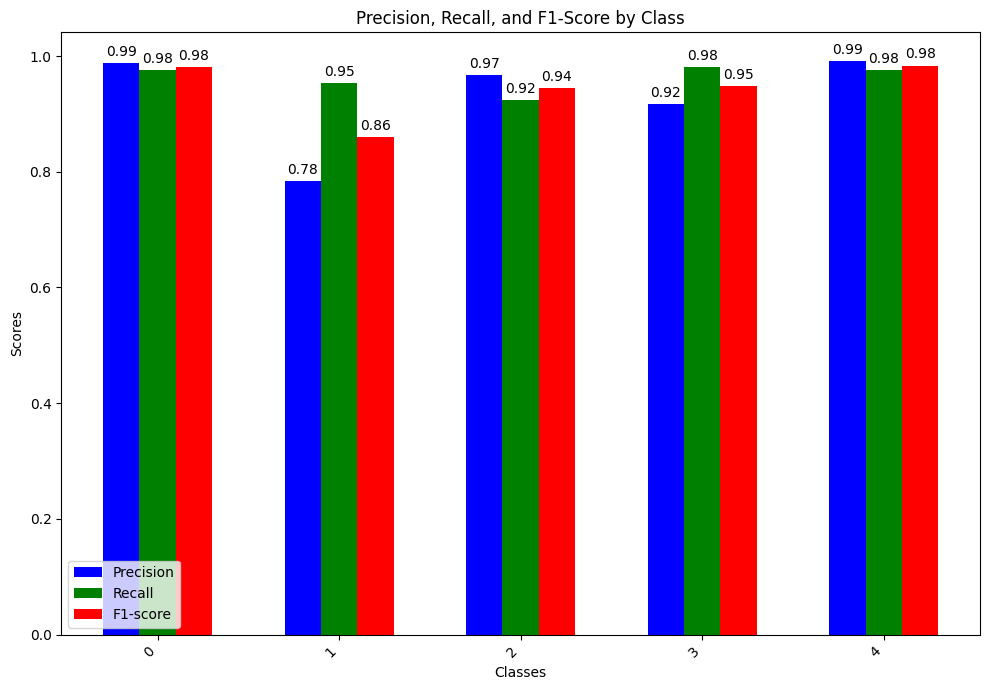

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the saved model
model = load_model('xception_model.keras')

# Directory for validation/test data
test_dir = 'data'  # Update to your test/validation directory

# Data Generator for test set
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Get ground truth labels and class indices
true_labels = test_generator.classes
class_indices = test_generator.class_indices
class_names = list(class_indices.keys())

# Make predictions
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Get classification report as a dictionary
report = classification_report(true_labels, predicted_labels, target_names=class_names, output_dict=True)

# Extract precision, recall, f1-score values for each class
precision = [report[cls]['precision'] for cls in class_names]
recall = [report[cls]['recall'] for cls in class_names]
f1_score = [report[cls]['f1-score'] for cls in class_names]

# Create bar chart
x = np.arange(len(class_names))  # The label locations
width = 0.2  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 7))

# Plot bars for precision, recall, and F1-score
bars1 = ax.bar(x - width, precision, width, label='Precision', color='b')
bars2 = ax.bar(x, recall, width, label='Recall', color='g')
bars3 = ax.bar(x + width, f1_score, width, label='F1-score', color='r')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score by Class')
ax.set_xticks(x)
ax.set_xticklabels(class_names, rotation=45, ha="right")
ax.legend()

# Display the values above the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

# Adjust layout for better display
fig.tight_layout()

# Show the plot
plt.show()
